In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ=pd.read_csv('fuel-econ.csv')

sedan_classes=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses=pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classes)
fuel_econ.VClass=fuel_econ.VClass.astype(vclasses)

fuel_econ['trans_type']=fuel_econ.trans.apply(lambda x:x.split()[0])
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [15]:
np.random.seed(2017)
sample=np.random.choice(fuel_econ.shape[0],200,replace=True)
fuel_econ_subset=fuel_econ.loc[sample]

## Non-Positional Encodings for Third Variables
### Third variable is Transition Type (using shape)

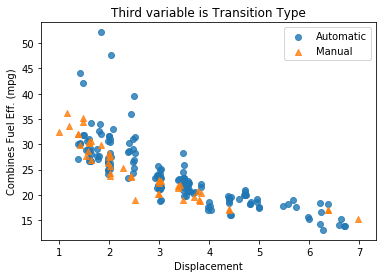

In [20]:
ttype_markers = [['Automatic','o'],
                 ['Manual','^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset.trans_type==ttype]
    sb.regplot(data=plot_data,x='displ',y='comb',x_jitter=0.04,fit_reg=False,marker=marker)
plt.xlabel('Displacement')
plt.ylabel('Combines Fuel Eff. (mpg)');
plt.legend(['Automatic','Manual'])
plt.title('Third variable is Transition Type');

### Third variable is CO2 Emission (marker size)

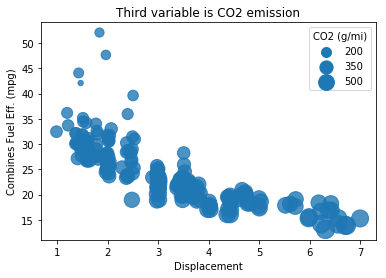

In [28]:
sb.regplot(data=fuel_econ_subset,x='displ',y='comb',x_jitter=0.04,fit_reg=False,
          scatter_kws={'s':fuel_econ_subset['co2']/2})
plt.xlabel('Displacement')
plt.ylabel('Combines Fuel Eff. (mpg)');
plt.title('Third variable is CO2 emission');
base_color=sb.color_palette()[0]

#setting legend for sameshape different size objects
sizes=[200,350,500]
legend_obj=[plt.scatter([],[],s=s/2,color=base_color) for s in sizes]

plt.legend(legend_obj,sizes,title='CO2 (g/mi)');

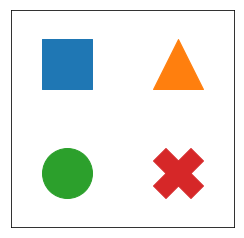

In [31]:
plt.figure(figsize = [4,4])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

## Color

For Trans_type

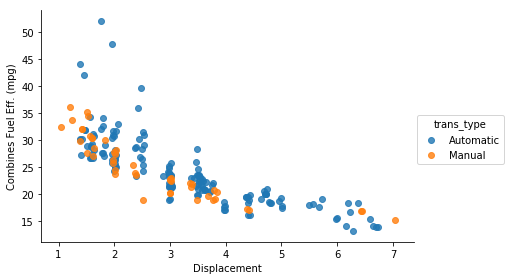

In [38]:
g=sb.FacetGrid(data=fuel_econ_subset, hue='trans_type',
              hue_order=['Automatic','Manual'],
              size=4,aspect=1.5)
g.map(sb.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement')
plt.ylabel('Combines Fuel Eff. (mpg)');

For VClass, which is categorical varible, use color transperancy 

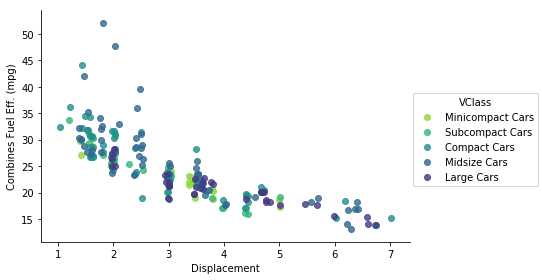

In [42]:
g=sb.FacetGrid(data=fuel_econ_subset, hue='VClass',
              palette='viridis_r',
              size=4,aspect=1.5)
g.map(sb.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement')
plt.ylabel('Combines Fuel Eff. (mpg)');

CO2 emission with color palette

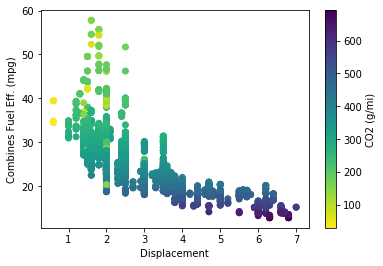

In [43]:
plt.scatter(data=fuel_econ,x='displ',y='comb',c='co2',cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement')
plt.ylabel('Combines Fuel Eff. (mpg)');

## Overlapping Color plots

**Dont do the following.**

- When different colored plots overlap and produce new color, the result may be a third color that cannot be matched to something in the palette.
- When same color transparency plots are ovelapped they give different meaning alltogether.


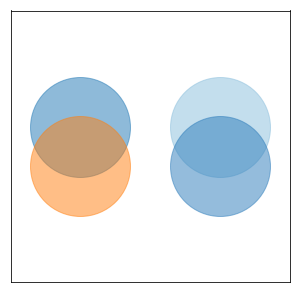

In [46]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sb.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sb.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sb.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sb.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([]);

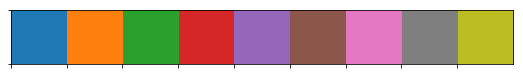

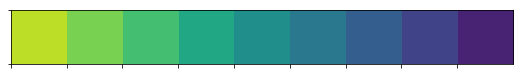

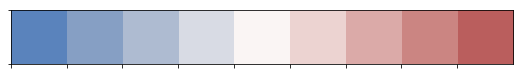

In [51]:
sb.palplot(sb.color_palette(n_colors=9));  # for nominal
sb.palplot(sb.color_palette('viridis_r', 9)); #for ordinal
sb.palplot(sb.color_palette('vlag', 9)); #With center as focus and decreasing/increasing colors on either side.

## Practice

In [55]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


Task 1: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

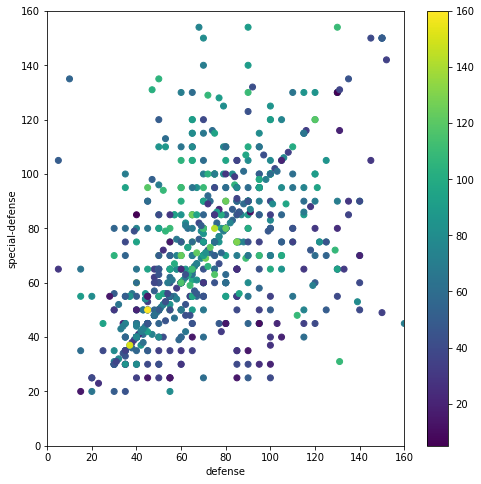

In [76]:
# YOUR CODE HERE
plt.figure(figsize=[8,8])
plt.scatter(data=pokemon,x='defense',y='special-defense',c='speed');
plt.colorbar()
plt.xlabel('defense')
plt.ylabel('special-defense');
plt.xlim(0,160);
plt.ylim(0,160);

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [58]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [60]:
# YOUR CODE HERE
fairy_dragon_pokemons=pkmn_types[pkmn_types.type.isin(['fairy','dragon'])]
fairy_dragon_pokemons.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


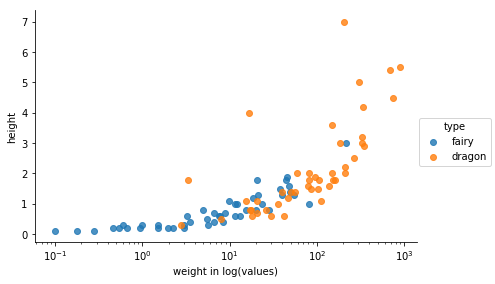

In [139]:
plt.figure(figsize=[8,8])
g=sb.FacetGrid(data=fairy_dragon_pokemons,hue='type',size=4,aspect=1.5)
g.map(sb.regplot,'weight','height',x_jitter=0.04,fit_reg=False);
g.set(xscale='log')
# g.set_xlabels([0.1,0.3,1,3,10,30,100,300,1000])
g.add_legend()
plt.xlabel('weight in log(values)');
plt.ylabel('height');

## Faceting in Two Directions

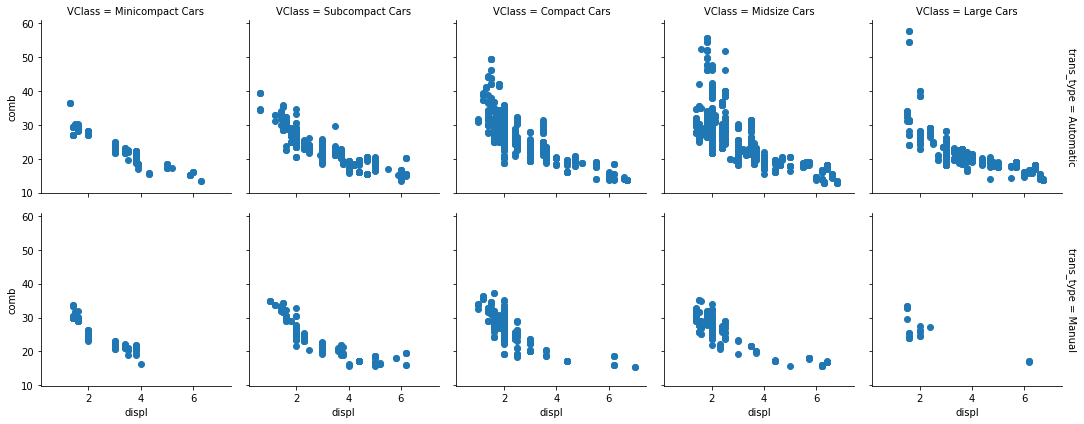

In [144]:
g=sb.FacetGrid(data=fuel_econ,col='VClass',row='trans_type',margin_titles=True)
g.map(plt.scatter,'displ','comb');

## Other Adaptations of Bivariate Plots

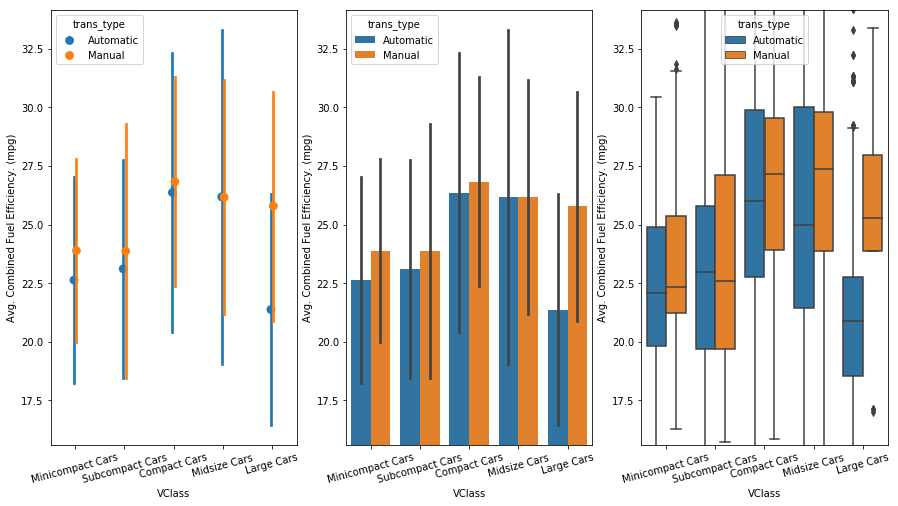

In [149]:
#Mean is internally calcualted and graph is plot
plt.figure(figsize=[15,8])
#point plot
plt.subplot(1,3,1)
ax=sb.pointplot(data=fuel_econ,x='VClass',y='comb',
                hue='trans_type', #multivariate
                dodge=True, #To remove overlapping
             ci='sd',  #Standard Deviation
             linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency. (mpg)');

#barplot
plt.subplot(1,3,2)
sb.barplot(data=fuel_econ,x='VClass',y='comb',
             hue='trans_type', #multivariate
             ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency. (mpg)');
plt.ylim(ax.get_ylim())

plt.subplot(1,3,3)
sb.boxplot(data=fuel_econ,x='VClass',y='comb',hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency. (mpg)');
plt.ylim(ax.get_ylim());

## Plot Matrices
We can see the correlation between the variables using the following two plots

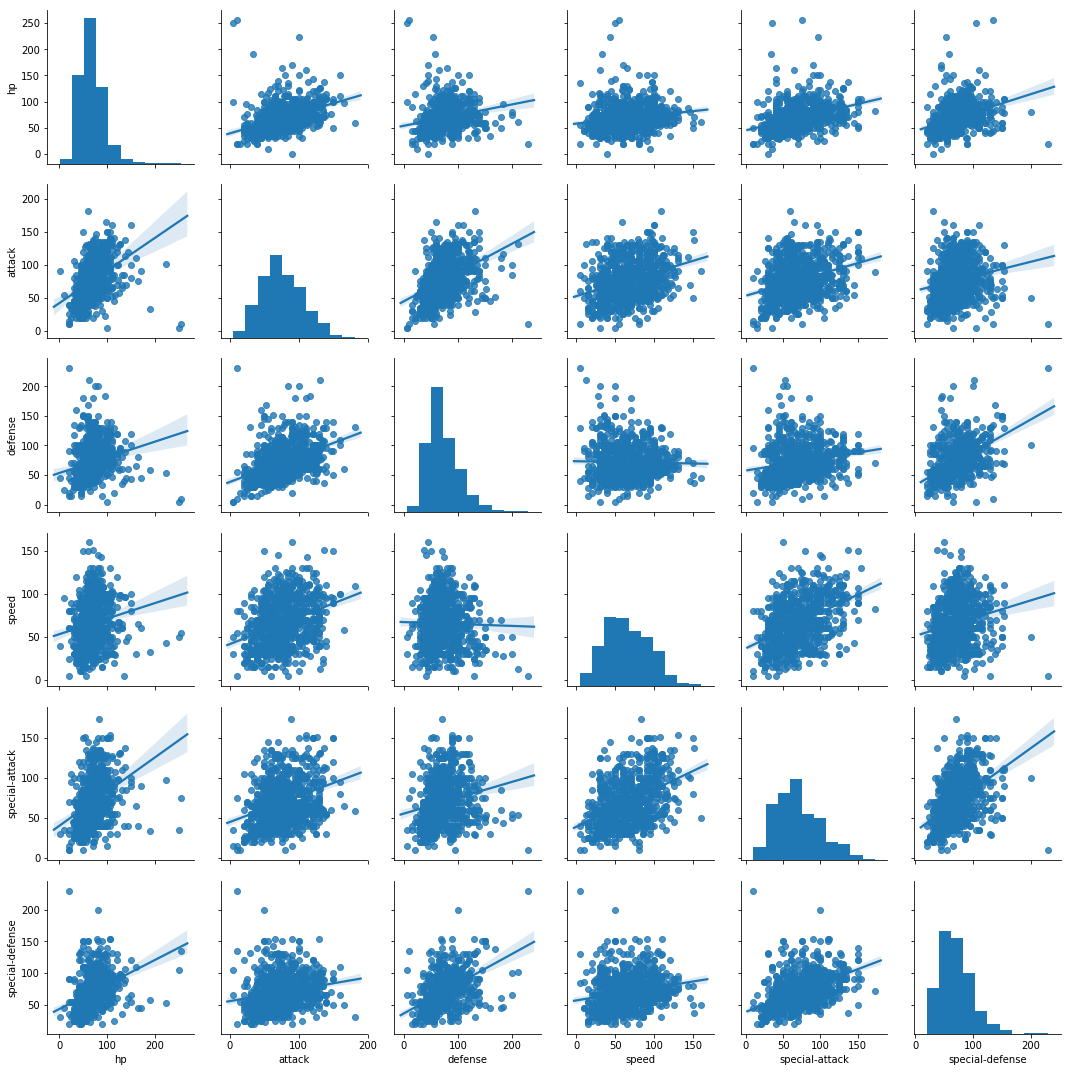

In [153]:
pkmn_stats=['hp', 'attack', 'defense', 'speed','special-attack', 'special-defense']
g=sb.PairGrid(data=pokemon,vars=pkmn_stats)
g.map_offdiag(sb.regplot)
g.map_diag(plt.hist);

### Correlation Matrix

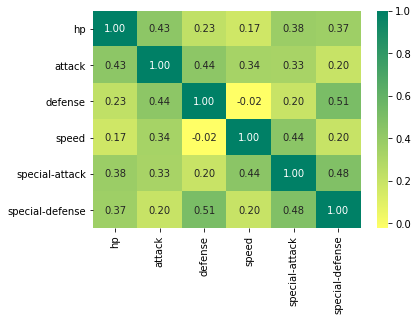

In [163]:
sb.heatmap(pokemon[pkmn_stats].corr(),cmap='summer_r',annot=True,fmt='.2f');

## Feature Engineering

In [164]:
pokemon['attk_ratio']=pokemon['attack']/pokemon['special-attack']
pokemon['dfe_ratio']=pokemon['defense']/pokemon['special-defense']

In [171]:
pokemon.dfe_ratio.size,pokemon.attk_ratio.size

(807, 807)

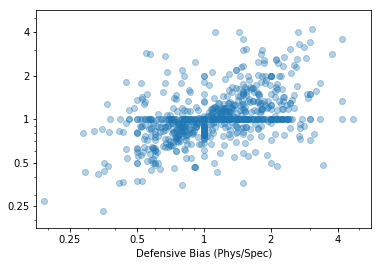

In [177]:
plt.scatter(data=pokemon,x='attk_ratio',y='dfe_ratio',alpha=1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.xlabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc=[0.25,0.5,1,2,4]
plt.xticks(tick_loc,tick_loc)
plt.yticks(tick_loc,tick_loc);
plt.xlim(2**-2.5,2**2.5)
plt.ylim(2**-2.5,2**2.5);

## Practice
**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

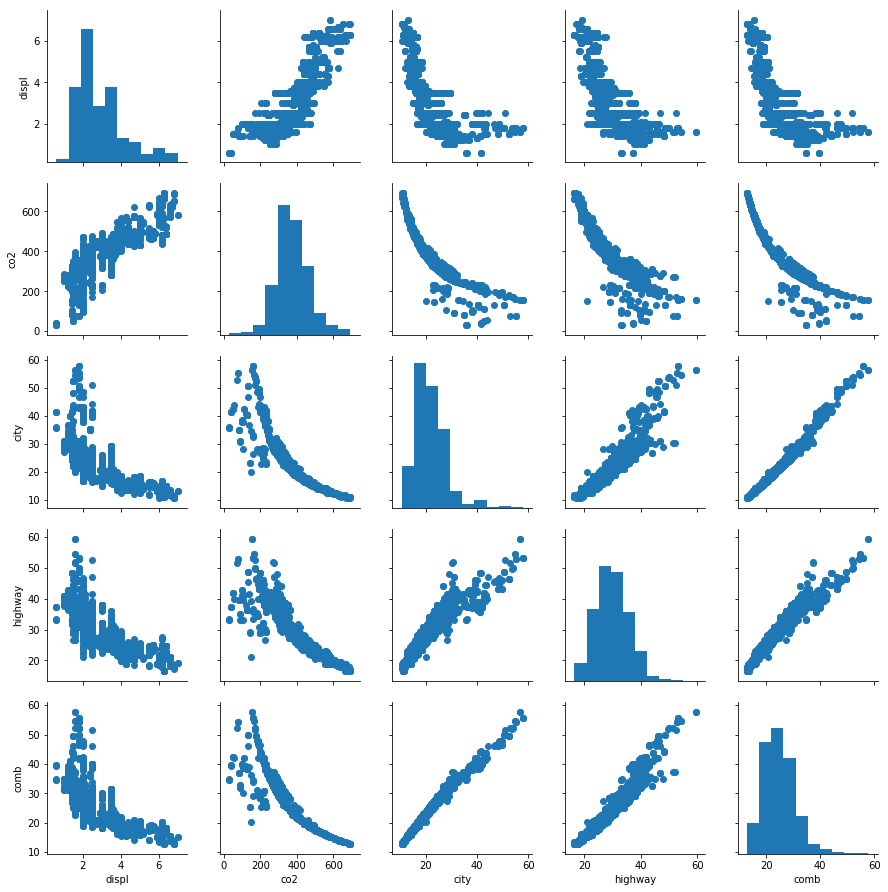

In [178]:
vars=['displ', 'co2', 'city', 'highway', 'comb']
g=sb.PairGrid(data=fuel_econ,vars=vars)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

__Task 2__: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

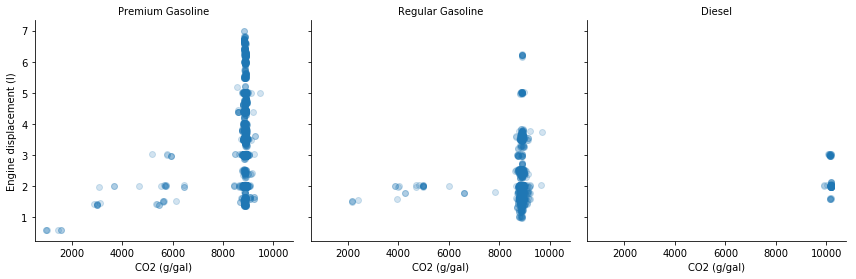

In [180]:
fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

# plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'fuelType', size = 4,
                 col_wrap = 3)
g.map(sb.regplot, 'co2_gal', 'displ', y_jitter = 0.04, fit_reg = False,
      scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}');